# 第1章 统计学习方法概论 (廖睿力修改过-20181222)

高斯于1823年在误差e1 ,… , en独立同分布的假定下,证明了最小二乘方法的一个最优性质: 在所有无偏的线性估计类中,最小二乘方法是其中方差最小的！

### 使用最小二乘法拟和曲线

对于数据$(x_i, y_i)(i=1, 2, 3...,m)$

拟合出函数$h(x)$

有误差，即残差：$r_i=h(x_i)-y_i$

此时L2范数(残差平方和)最小时，h(x) 和 y 相似度最高，更拟合

一般的H(x)为n次的多项式，$H(x)=w_0+w_1x+w_2x^2+...w_nx^n$

$w(w_0,w_1,w_2,...,w_n)$为参数

最小二乘法就是要找到一组 $w(w_0,w_1,w_2,...,w_n)$ 使得$\sum_{i=1}^n(h(x_i)-y_i)^2$ (残差平方和) 最小

即，求 $min\sum_{i=1}^n(h(x_i)-y_i)^2$

----

举例：我们用目标函数$y=sin2{\pi}x$, 加上一个正太分布的噪音干扰，用多项式去拟合【例1.1 11页】

*ps: numpy.poly1d([1,2,3])  生成  $1x^2+2x^1+3x^0$*

## 正式开始前 我将需要用到的code做下说明
廖睿力 20181222

<table width=100% style="color:white"><tr><td  bgcolor=“＃6699CC” style="text-align:left;"> np.linspace(0,1,20) &#151; 将区间平均分</td></tr></table>

In [1]:
import numpy as np

np.linspace(0, 1, 10)


array([ 0.        ,  0.11111111,  0.22222222,  0.33333333,  0.44444444,
        0.55555556,  0.66666667,  0.77777778,  0.88888889,  1.        ])

<table width=100% style="color:white"><tr><td  bgcolor=“＃6699CC” style="text-align:left;"> 

 np.random.normal(0, 1) &#151;   随机生成正态分布的数据


</td></tr></table>

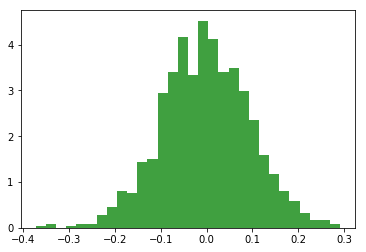

In [2]:
y = [np.random.normal(0, 0.1) for i in range(1000)]

# 画图
import matplotlib.pyplot as plt

plt.hist(y,30,normed=1,histtype='bar',facecolor='green',alpha=0.75)
plt.show()

<table width=100% style="color:white"><tr><td  bgcolor=“＃6699CC” style="text-align:left;"> 
np.random.rand(2) &#151;  随机生成长度为2的list 

</td></tr></table>

In [3]:
np.random.rand(2)

array([ 0.84247014,  0.70251012])

<table width=100% style="color:white"><tr><td  bgcolor=“＃6699CC” style="text-align:left;"> 
np.poly1d(p) &#151;  p为list，生成最高次数为len(p)-1的多项式函数，其中次数由高到低

</td></tr></table>

In [4]:
f = np.poly1d([1,2,3])
f(2)

11

<table width=100% style="color:white"><tr><td  bgcolor=“＃6699CC” style="text-align:left;"> 
leastsq(residuals_func, [多项式系数], args=(x, y)) &#151;  最小二乘法
</td></tr></table>

In [5]:
from scipy.optimize import leastsq

# 定义拟合要用的多项式模型
def fit_func(p, x):
    f = np.poly1d(p)  # 生成多项式函数，其中次数由高到低 
    return f(x)        # x可以为list


In [6]:
fit_func([1,2,3],2)

11

In [7]:
fit_func([1,2,3],[2,3,4])

array([11, 18, 27])

In [8]:
# 定义cost function

def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret


In [9]:
residuals_func([1,2,3],[2,3,4],[1,2,3])

array([10, 16, 24])

[  2.18209746e-08  -1.90413113e+00   9.52065560e-01]


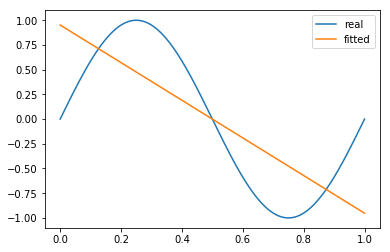

0.19675217396313946

In [10]:
# 样本
x = np.linspace(0,1,1000)
y = [np.sin(2*np.pi*x_) for x_ in x]

# 最小二乘法求参数
p_lsq = leastsq(residuals_func, np.random.rand(3), args=(x, y))
plt.plot(x,y,label='real')
plt.plot(x,fit_func(p_lsq[0],x),label='fitted')

print(p_lsq[0])
plt.legend()
plt.show()

# 查看平均损失
np.mean(np.square(residuals_func(p_lsq[0],x,y)), axis=0)


## 以下开始为正式代码
廖睿力有做调整，修改了正则化的代码错误
新增了模型复杂度和误差之间关系的可视化

In [11]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# 目标函数
def real_func(x):
    return np.sin(2*np.pi*x)

# 多项式
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [13]:
# 一百个点
x = np.linspace(0, 1, 100)
x_points = np.linspace(0, 1, 1000)
# 加上正态分布噪音的目标函数的值
y_ = real_func(x)
y = [np.random.normal(0, 0.1)+y1 for y1 in y_]

def fitting(M=0):
    """
    n 为 多项式的次数
    """    
    # 随机初始化多项式参数
    p_init = np.random.rand(M+1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])
    
    # 可视化
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise',markersize=2)
    plt.legend()
    return p_lsq

Fitting Parameters: [ 0.01317941]


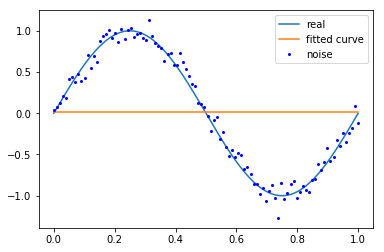

In [14]:
# M=0
p_lsq_0 = fitting(M=0)

Fitting Parameters: [-1.83206011  0.92920946]


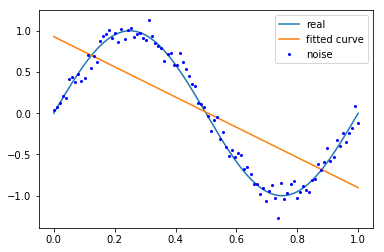

In [15]:
# M=1
p_lsq_1 = fitting(M=1)

Fitting Parameters: [ 22.69590708 -34.24426034  11.91757152  -0.20449231]


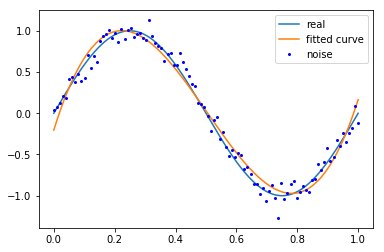

In [16]:
# M=3
p_lsq_3 = fitting(M=3)

Fitting Parameters: [  4.69654008e+02  -1.84810388e+03   2.90738805e+03  -2.32312137e+03
   9.26865176e+02  -5.85669662e+01  -9.67155344e+01   1.83013446e+01
   4.22037207e+00   4.77774000e-02]


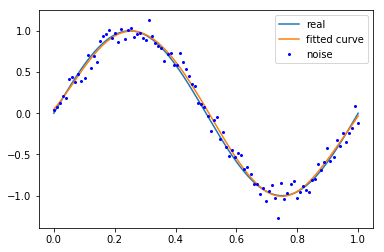

In [17]:
# M=9
p_lsq_9 = fitting(M=9)

In [18]:
regularization = 0.01

def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret, np.sqrt(len(x))*np.sqrt(0.5*regularization*np.square(p))) # L2范数作为正则化项
                                  # 增加np.sqrt(len(x)) 廖睿力 20181222
    return ret

In [19]:
# 最小二乘法,加正则化项
p_init = np.random.rand(9+1)
p_lsq_regularization = leastsq(residuals_func_regularization, p_init, args=(x, y))

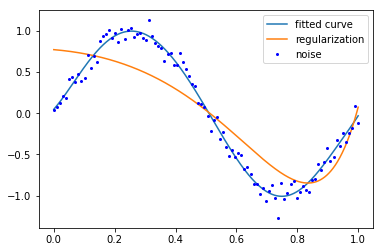

In [20]:
# plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(x_points, fit_func(p_lsq_regularization[0], x_points), label='regularization')
plt.plot(x, y, 'bo', label='noise',markersize=2)
plt.legend()
plt.show()

In [21]:
p_lsq_regularization[0]

array([ 0.94633084,  0.86729701,  0.71317855,  0.45134848,  0.04353337,
       -0.5362597 , -1.229645  , -1.63965203, -0.3140649 ,  0.77139408])

<table width=100% style="color:white"><tr><td  bgcolor=“＃6699CC” style="text-align:left;"> 
不加正则项平均误差随项数增加的变化
</td></tr></table>

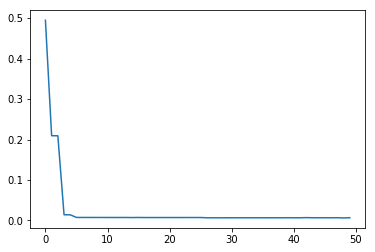

In [22]:
def fitting2(M=0):
    """
    n 为 多项式的次数
    """    
    # 随机初始化多项式参数
    p_init = np.random.rand(M+1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    #print(M,': Fitting Parameters:', p_lsq[0])
    return p_lsq

n=[]
M_residual=[]
for i in range(50):
    n.append(i)
    M_residual.append(np.mean(np.square(residuals_func(fitting2(i)[0],x,y)), axis=0))
    
plt.plot(n,M_residual)
plt.show()

<table width=100% style="color:white"><tr><td  bgcolor=“＃6699CC” style="text-align:left;"> 
添加加正则项平均误差随项数增加的变化
</td></tr></table>

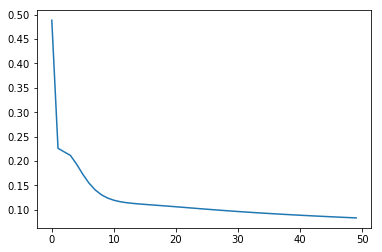

In [42]:
def fitting3(M=0):
    """
    n 为 多项式的次数
    """    
    # 随机初始化多项式参数
    p_init = np.random.rand(M+1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func_regularization, p_init, args=(x, y))
    #print(M,': Fitting Parameters:', p_lsq[0])
    return p_lsq

n=[]
M_residual=[]
for i in range(50):
    n.append(i)
    M_residual.append(np.mean(np.square(residuals_func_regularization(fitting3(i)[0],x,y)), axis=0))
    
plt.plot(n,M_residual)
plt.show()

<table width=100% style="color:white"><tr><td  bgcolor=“＃6699CC” style="text-align:left;"> 
先用非正则化来估计系数，再用添加加正则化的平均误差函数求出平均误差，比较该误差随项数增加的变化
</td></tr></table>

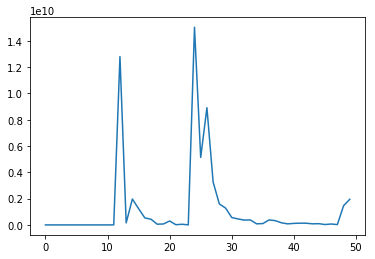

In [23]:
n=[]
M_residual=[]
for i in range(50):
    n.append(i)
    M_residual.append(np.mean(np.square(residuals_func_regularization(fitting2(i)[0],x,y)), axis=0))
    
plt.plot(n,M_residual)
plt.show()